In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
# Step 1: Load the HR Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHour

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


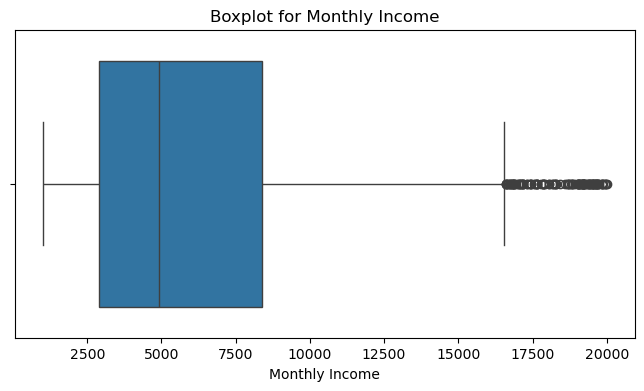

In [8]:
# Step 4: Outlier Detection (Optional Visualization)
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['MonthlyIncome'])
plt.title('Boxplot for Monthly Income')
plt.xlabel('Monthly Income')
plt.show()

In [9]:
le = LabelEncoder()
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

print("\nData after Label Encoding:")
print(data.head())



Data after Label Encoding:
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1   

In [10]:
# Step 8: Save Cleaned Data to CSV
cleaned_file_path = 'HR_Employee_Attrition_Cleaned.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\n✅ Cleaned data saved to: {cleaned_file_path}")



✅ Cleaned data saved to: HR_Employee_Attrition_Cleaned.csv


In [11]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = data.drop(['Attrition'], axis=1)  # Drop the target column
y = data['Attrition']  # Target variable (e.g., 1 = left, 0 = stayed)

# Split into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1176, 34)
Testing set shape: (294, 34)


In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)


Mean Squared Error (MSE): 0.1071195282305256
R-squared (R²) Score: 0.0689810415149611


In [19]:
"Hyperparameter"

'Hyperparameter'

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Set up hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Initialize and search
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 3: Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 5: Print results
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Accuracy:", accuracy)
print("✅ Precision:", precision)
print("✅ Recall:", recall)
print("✅ F1 Score:", f1)
print("\n📊 Classification Report:\n", report)


✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
✅ Accuracy: 0.8809523809523809
✅ Precision: 1.0
✅ Recall: 0.10256410256410256
✅ F1 Score: 0.18604651162790697

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



In [24]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("✅ Model has been saved as 'model.pkl'")


✅ Model has been saved as 'model.pkl'


In [25]:
model = pickle.load(open('model.pkl', 'rb'))

In [26]:
# Loading the saved model
loaded_model = pickle.load(open('model.pkl', 'rb'))
print("✅ Model loaded successfully:", loaded_model)

✅ Model loaded successfully: RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)


In [27]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the trained HR attrition model
model = pickle.load(open('model.pkl', 'rb'))

app = Flask(__name__)

@app.route('/')
def home():
    return "HR Attrition Prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    
    # Extract features in the same order used during training
    input_features = [
        data['Age'],
        data['BusinessTravel'],
        data['DailyRate'],
        data['Department'],
        data['DistanceFromHome'],
        data['Education'],
        data['EducationField'],
        data['EmployeeCount'],
        data['EmployeeNumber'],
        data['EnvironmentSatisfaction'],
        data['Gender'],
        data['HourlyRate'],
        data['JobInvolvement'],
        data['JobLevel'],
        data['JobRole'],
        data['JobSatisfaction'],
        data['MaritalStatus'],
        data['MonthlyIncome'],
        data['MonthlyRate'],
        data['NumCompaniesWorked'],
        data['Over18'],
        data['OverTime'],
        data['PercentSalaryHike'],
        data['PerformanceRating'],
        data['RelationshipSatisfaction'],
        data['StandardHours'],
        data['StockOptionLevel'],
        data['TotalWorkingYears'],
        data['TrainingTimesLastYear'],
        data['WorkLifeBalance'],
        data['YearsAtCompany'],
        data['YearsInCurrentRole'],
        data['YearsSinceLastPromotion'],
        data['YearsWithCurrManager'],
        data['average satisfaction'],     # If used
        data['total_experience']          # If used
    ]

    input_array = np.array(input_features).reshape(1, -1)
    prediction = model.predict(input_array)
    
    return jsonify({'Attrition Prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
